In [76]:
import sys
import pandas as pd
import sklearn
import keras

In [77]:
file = 'Autism-Child-Data.txt'
data = pd.read_table(file, sep = ',', index_col = None)

In [78]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [79]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])

A1_Score                      1
A2_Score                      1
A3_Score                      0
A4_Score                      0
A5_Score                      1
A6_Score                      1
A7_Score                      0
A8_Score                      1
A9_Score                      0
A10_Score                     0
age                           6
gender                        m
ethnicity                Others
jundice                      no
austim                       no
contry_of_res            Jordan
used_app_before              no
result                        5
age_desc           '4-11 years'
relation                 Parent
Class                        NO
Name: 0, dtype: object


In [80]:
# print out multiple patients at the same time
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES
7,1,1,1,1,1,1,1,1,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,8,'4-11 years',Parent,YES
8,1,1,1,1,1,1,1,0,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,7,'4-11 years',Parent,YES
9,0,0,1,1,1,0,1,1,0,0,...,f,?,no,yes,Austria,no,5,'4-11 years',?,NO


In [81]:
# print out a description of the dataframe
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         292 non-null    int64 
 1   A2_Score         292 non-null    int64 
 2   A3_Score         292 non-null    int64 
 3   A4_Score         292 non-null    int64 
 4   A5_Score         292 non-null    int64 
 5   A6_Score         292 non-null    int64 
 6   A7_Score         292 non-null    int64 
 7   A8_Score         292 non-null    int64 
 8   A9_Score         292 non-null    int64 
 9   A10_Score        292 non-null    int64 
 10  age              292 non-null    object
 11  gender           292 non-null    object
 12  ethnicity        292 non-null    object
 13  jundice          292 non-null    object
 14  austim           292 non-null    object
 15  contry_of_res    292 non-null    object
 16  used_app_before  292 non-null    object
 17  result           292 non-null    in

In [83]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class              0
dtype: int64

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

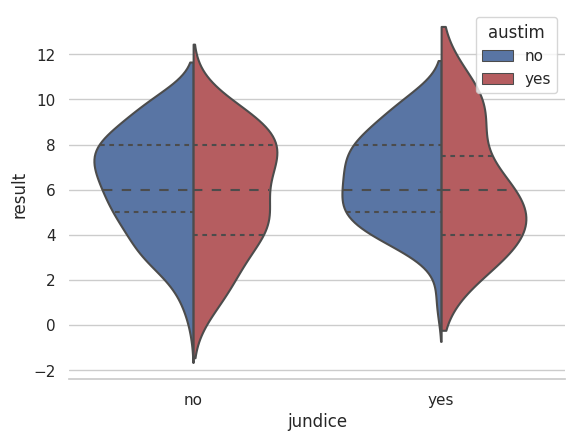

In [86]:
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="jundice", y="result", hue="austim", data=data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

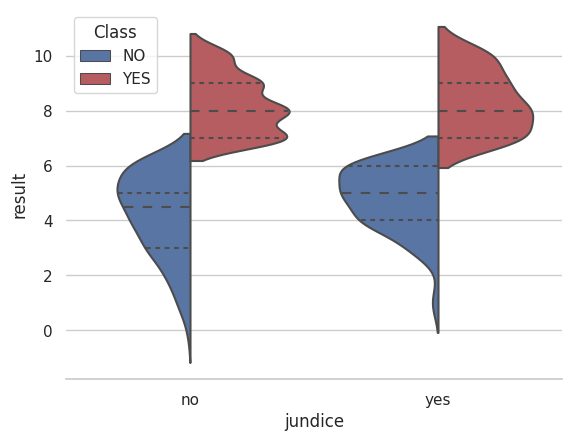

In [88]:
sns.violinplot(x="jundice", y="result", hue="Class", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

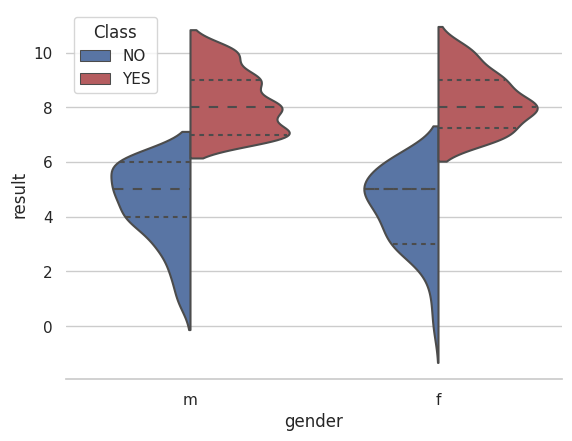

In [90]:
sns.violinplot(x="gender", y="result", hue="Class", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

In [91]:
# drop unwanted columns
data = data.drop(['result', 'age_desc'], axis=1)

In [92]:
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,no,Jordan,no,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,'United States',no,Parent,YES
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,?,NO
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,'United Kingdom',no,Parent,YES
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no,no,Bahrain,no,Parent,YES
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no,no,Bahrain,no,Parent,YES
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,?,NO


In [93]:
# create X and Y datasets for training
x = data.drop(columns=['Class'])
y = data['Class']

In [94]:
x.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,no,Jordan,no,Parent
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,?
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,?
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,'United States',no,Parent
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,?
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,'United Kingdom',no,Parent
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no,no,Bahrain,no,Parent
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no,no,Bahrain,no,Parent
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,?


In [95]:
# convert the data to categorical values - one-hot-encoded vectors
X = pd.get_dummies(x)

In [96]:
# print the new categorical column labels
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age_10', 'age_11', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8',
       'age_9', 'age_?', 'gender_f', 'gender_m',
       "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'",
       'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jundice_no', 'jundice_yes',
       'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'",
       "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'",
       "contry_of_res_'Saudi Arabia'", "contry_of_res_'South Africa'",
       "contry_of_res_'South Korea'",
       "contry_of_res_'U.S. Outlying Islands'",
       "contry_of_res_'United Arab Emirates'",
       "contry_of_res_'United Kingdom'", "contry_of_res_'United States'",
       'contry_of_res_Afg

In [97]:
# print an example patient from the categorical data
X.loc[1]

A1_Score             1
A2_Score             1
A3_Score             0
A4_Score             0
A5_Score             1
                    ..
relation_?           0
relation_Parent      1
relation_Relative    0
relation_Self        0
relation_self        0
Name: 1, Length: 96, dtype: int64

In [98]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [99]:
Y.iloc[:10]

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,1,0


In [100]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

### Building the Network - Keras


In [101]:
# build a neural network using Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=96, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 776       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 822 (3.21 KB)
Trainable params: 822 (3.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Training the Network

Now it's time for the fun! Training a Keras model is as simple as calling model.fit().

In [102]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
24/24 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.4979
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5193
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5193
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5193
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.5193
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6524
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.7854
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5033 - accuracy: 0.8455
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.9056
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8970
Epoch 11/50
24/24 [

In [103]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions

2/2 [==============================] - 0s 5ms/step


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [104]:
print('Results for Categorical Model')
print(accuracy_score(Y_test[['YES']], predictions))
print(classification_report(Y_test[['YES']], predictions))

Results for Categorical Model
0.9152542372881356
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.86      0.91        29

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59

